In [1]:
import os
import random
import skimage.data
import skimage.transform
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [64]:
def load_data(data_dir):
    """Loads a data set and returns two lists:
    
    images: a list of Numpy arrays, each representing an image.
    labels: a list of numbers that represent the images labels.
    """
    # Get all subdirectories of data_dir. Each represents a label.
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]
    # Loop through the label directories and collect the data in
    # two lists, labels and images.
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) if f.endswith(".ppm")]
        # For each label, load it's images and add them to the images list.
        # And add the label number (i.e. directory name) to the labels list.
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    return images, labels


# Load training and testing datasets.
ROOT_PATH = r"C:\Users\sm50014\Desktop\traffic"
train_data_dir = os.path.join(ROOT_PATH, "datasets\Training")
test_data_dir = os.path.join(ROOT_PATH, "datasets\Testing")

image, label = load_data(train_data_dir)

In [32]:
labels_a = np.array(labels)
images_a = np.array(images)

print(images.shape)
print(labels.shape)

AttributeError: 'list' object has no attribute 'shape'

In [4]:
print("Unique Labels: {0}\nTotal Images: {1}".format(len(set(labels)), len(images)))

Unique Labels: 62
Total Images: 4575


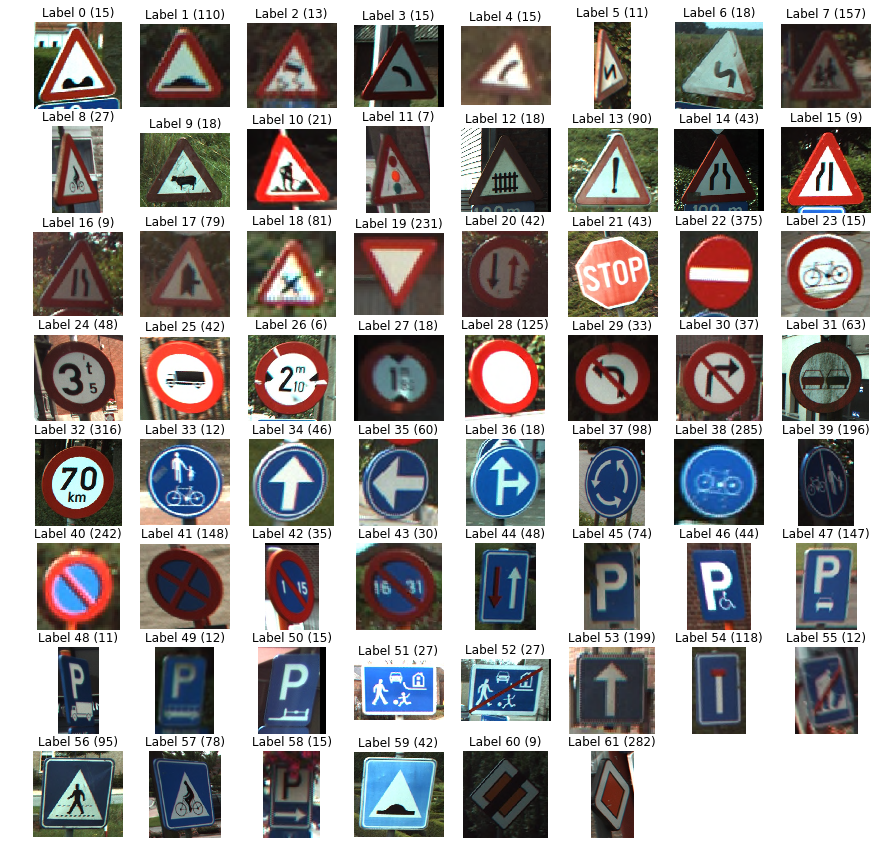

In [5]:
def display_images_and_labels(images, labels):
    """Display the first image of each label."""
    unique_labels = set(labels)
    plt.figure(figsize=(15, 15))
    i = 1
    for label in unique_labels:
        # Pick the first image for each label.
        image = images[labels.index(label)]
        plt.subplot(8, 8, i)  # A grid of 8 rows x 8 columns
        plt.axis('off')
        plt.title("Label {0} ({1})".format(label, labels.count(label)))
        i += 1
        _ = plt.imshow(image)
    plt.show()

display_images_and_labels(images, labels)

In [6]:
import matplotlib.pyplot as plt
import random
from PIL import Image
import numpy as np
import random
from PIL import Image, ImageEnhance
# Visualizations will be shown in the notebook.
%matplotlib inline

# Load name of id
with open("signnames.csv", "r") as f:
    signnames = f.read()
   # print(signnames)
id_to_name = { int(line.split(",")[0]):line.split(",")[1] for line in signnames.split("\n")[1:] if len(line) > 0}

print(id_to_name)

{0: 'Speed limit (20km/h)', 1: 'Speed limit (30km/h)', 2: 'Speed limit (50km/h)', 3: 'Speed limit (60km/h)', 4: 'Speed limit (70km/h)', 5: 'Speed limit (80km/h)', 6: 'End of speed limit (80km/h)', 7: 'Speed limit (100km/h)', 8: 'Speed limit (120km/h)', 9: 'No passing', 10: 'No passing for vehicles over 3.5 metric tons', 11: 'Right-of-way at the next intersection', 12: 'Priority road', 13: 'Yield', 14: 'Stop', 15: 'No vehicles', 16: 'Vehicles over 3.5 metric tons prohibited', 17: 'No entry', 18: 'General caution', 19: 'Dangerous curve to the left', 20: 'Dangerous curve to the right', 21: 'Double curve', 22: 'Bumpy road', 23: 'Slippery road', 24: 'Road narrows on the right', 25: 'Road work', 26: 'Traffic signals', 27: 'Pedestrians', 28: 'Children crossing', 29: 'Bicycles crossing', 30: 'Beware of ice/snow', 31: 'Wild animals crossing', 32: 'End of all speed and passing limits', 33: 'Turn right ahead', 34: 'Turn left ahead', 35: 'Ahead only', 36: 'Go straight or right', 37: 'Go straight o

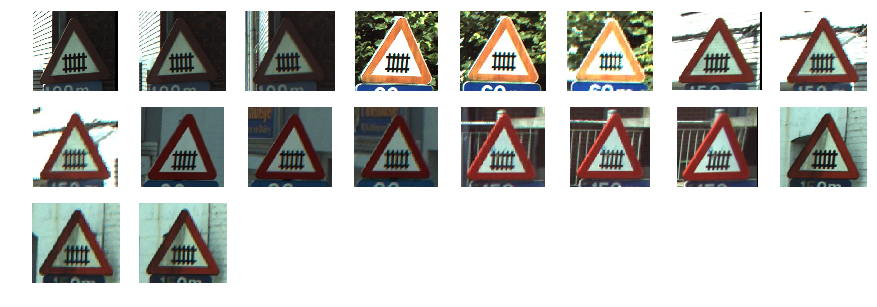

In [7]:
def display_label_images(images, label):
    """Display images of a specific label."""
    limit = 24  # show a max of 24 images
    plt.figure(figsize=(15, 5))
    i = 1

    start = labels.index(label)
    end = start + labels.count(label)
    for image in images[start:end][:limit]:
        plt.subplot(3, 8, i)  # 3 rows, 8 per row
        plt.axis('off')
        i += 1
        plt.imshow(image)
    plt.show()

display_label_images(images, 12)

In [8]:
for image in images[:5]:
    print("shape: {0}, min: {1}, max: {2}".format(image.shape, image.min(), image.max()))

shape: (141, 142, 3), min: 0, max: 255
shape: (120, 123, 3), min: 0, max: 255
shape: (105, 107, 3), min: 0, max: 255
shape: (94, 105, 3), min: 7, max: 255
shape: (128, 139, 3), min: 0, max: 255


C:\Users\sm50014\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


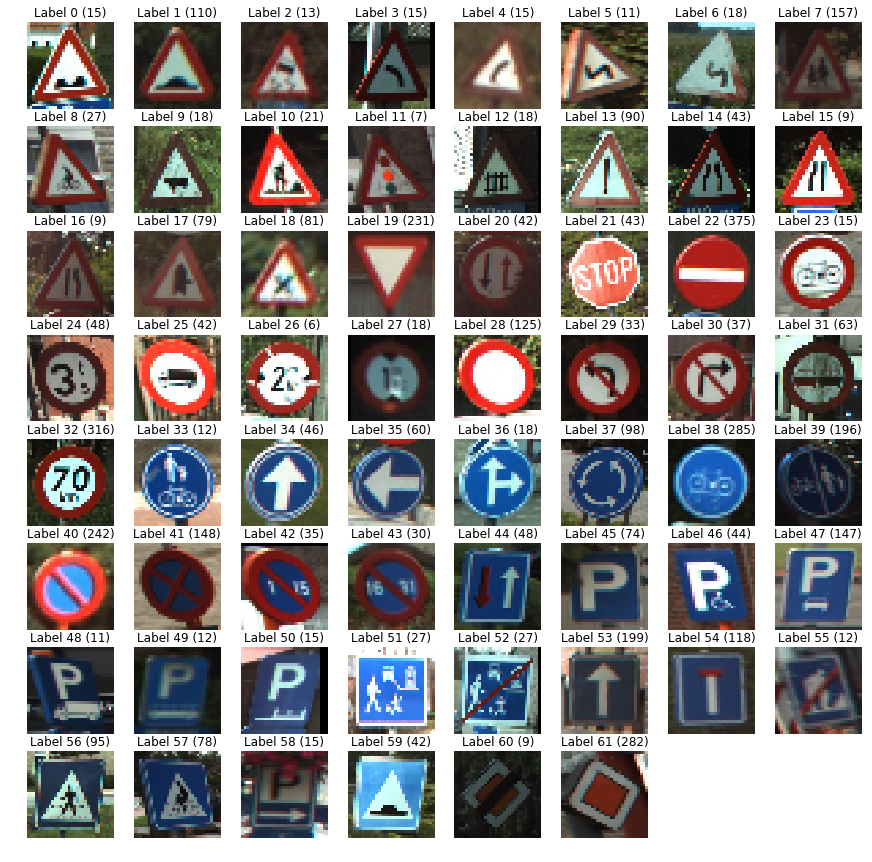

In [9]:
# Resize images
images32 = [skimage.transform.resize(image, (32, 32,3), mode='constant')
                for image in images]
display_images_and_labels(images32, labels)

In [10]:
for image in images32[:5]:
    print("shape: {0}, min: {1}, max: {2}".format(image.shape, image.min(), image.max()))

shape: (32, 32, 3), min: 0.007391237745097998, max: 1.0
shape: (32, 32, 3), min: 0.00357689950980412, max: 1.0
shape: (32, 32, 3), min: 0.0015567555147044665, max: 1.0
shape: (32, 32, 3), min: 0.05677466299019593, max: 0.969267003676469
shape: (32, 32, 3), min: 0.026654411764705677, max: 0.9895220588235298


In [11]:
labels_a = np.array(labels)
images_a = np.array(images32)
print("labels: ", labels_a.shape, "\nimages: ", images_a.shape)

labels:  (4575,) 
images:  (4575, 32, 32, 3)


In [12]:
# Create a graph to hold the model.
graph = tf.Graph()

# Create model in the graph.
with graph.as_default():
    # Placeholders for inputs and labels.
    images_ph = tf.placeholder(tf.float32, [None, 32, 32, 3])
    labels_ph = tf.placeholder(tf.int32, [None])

    # Flatten input from: [None, height, width, channels]
    # To: [None, height * width * channels] == [None, 3072]
    images_flat = tf.contrib.layers.flatten(images_ph)

    # Fully connected layer. 
    # Generates logits of size [None, 62]
    logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

    # Convert logits to label indexes (int).
    # Shape [None], which is a 1D vector of length == batch_size.
    predicted_labels = tf.argmax(logits, 1)

    # Define the loss function. 
    # Cross-entropy is a good choice for classification.
    loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=labels_ph))

    # Create training op.
    train = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

    # And, finally, an initialization op to execute before training.
    init = tf.global_variables_initializer()

print("images_flat: ", images_flat)
print("logits: ", logits)
print("loss: ", loss)
print("predicted_labels: ", predicted_labels)

images_flat:  Tensor("Flatten/flatten/Reshape:0", shape=(?, 3072), dtype=float32)
logits:  Tensor("fully_connected/Relu:0", shape=(?, 62), dtype=float32)
loss:  Tensor("Mean:0", shape=(), dtype=float32)
predicted_labels:  Tensor("ArgMax:0", shape=(?,), dtype=int64)


In [13]:
# Create a session to run the graph we created.
session = tf.Session(graph=graph)

# First step is always to initialize all variables. 
# We don't care about the return value, though. It's None.
_ = session.run([init])

In [16]:
for i in range(101):
    _, loss_value = session.run([train, loss], 
                                feed_dict={images_ph: images_a, labels_ph: labels_a})
    if i % 10 == 0:
        print("Loss: ", loss_value)

Loss:  1.5313337
Loss:  1.5310316
Loss:  1.5307349
Loss:  1.5304422
Loss:  1.5301551
Loss:  1.5298731
Loss:  1.5295944
Loss:  1.5293204
Loss:  1.5290518
Loss:  1.5287869
Loss:  1.5285282


In [17]:
# Pick 10 random images
sample_indexes = random.sample(range(len(images32)), 10)
sample_images = [images32[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

# Run the "predicted_labels" op.
predicted = session.run([predicted_labels], 
                        feed_dict={images_ph: sample_images})[0]
print(sample_labels)
print(predicted)

[32, 7, 43, 19, 22, 32, 37, 32, 19, 40]
[32  7  0 19 22 32 37 32 19 41]


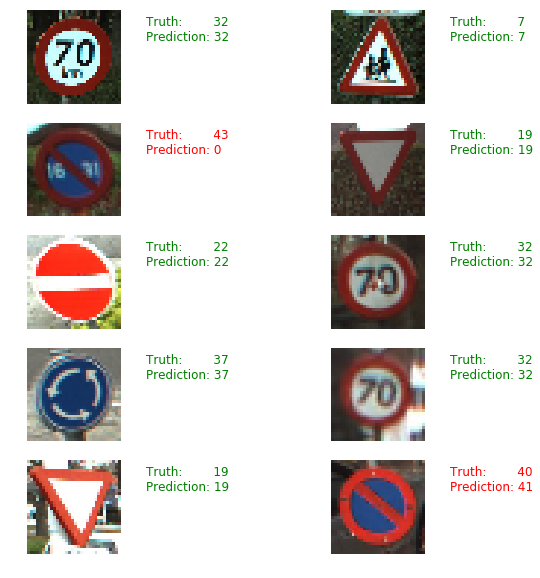

In [18]:
# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(sample_images[i])

In [19]:
# Load the test dataset.
test_images, test_labels = load_data(test_data_dir)

C:\Users\sm50014\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


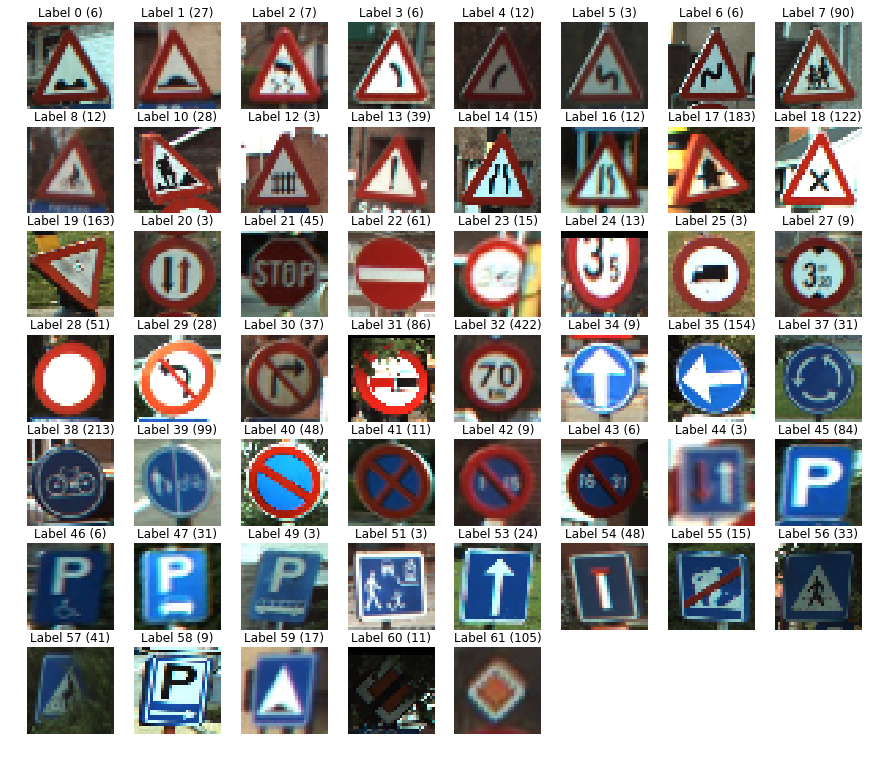

In [20]:
# Transform the images, just like we did with the training set.
test_images32 = [skimage.transform.resize(image, (32, 32, 3), mode='constant')
                 for image in test_images]
display_images_and_labels(test_images32, test_labels)

In [21]:
# Run predictions against the full test set. 
predicted = session.run([predicted_labels], 
                        feed_dict={images_ph: test_images32})[0]
# Calculate how many matches we got.
match_count = sum([int(y == y_) for y, y_ in zip(test_labels, predicted)])
accuracy = match_count / len(test_labels)
print("Accuracy: {:.3f}".format(accuracy))

Accuracy: 0.677


In [22]:
predicted[22]

7

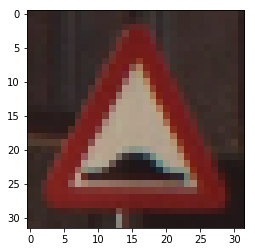

In [23]:
plt.imshow(test_images32[22])

In [24]:
fig = plt.figure(figsize=(10, 10))
for i in range(len(predicted)):
    print(predicted[i])

15
15
0
0
0
0
0
0
0
45
0
0
21
0
0
0
0
0
0
0
0
0
7
21
15
0
0
22
7
61
0
0
0
14
14
14
14
14
17
14
14
14
0
0
0
0
7
7
17
14
14
7
32
56
17
17
14
0
5
7
5
14
7
0
7
7
7
7
7
7
7
7
7
17
17
17
7
7
7
7
7
7
7
7
7
7
7
7
17
7
17
7
7
7
7
7
7
7
7
7
7
22
22
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
17
17
17
7
7
7
7
7
7
7
7
7
7
7
7
17
7
17
7
7
7
32
0
56
17
32
32
0
0
0
0
0
0
54
54
14
14
0
17
17
0
17
22
20
0
0
14
14
22
17
17
17
14
0
15
17
22
17
0
15
61
41
7
0
7
57
7
5
5
5
0
0
0
0
17
32
0
0
0
47
47
7
17
0
17
32
45
61
61
17
17
0
17
17
47
0
17
17
47
32
7
22
17
14
14
14
14
14
14
14
14
14
14
14
14
7
14
14
14
14
14
14
7
14
7
14
14
0
7
47
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
1

In [25]:
# Pick 10 random images
sample_indexes = random.sample(range(len(test_images32)), 10)
sample_images = [test_images32[i] for i in sample_indexes]
sample_labels = [test_labels[i] for i in sample_indexes]

# Run the "predicted_labels" op.
predicted = session.run([predicted_labels], 
                        feed_dict={images_ph: sample_images})[0]
print(sample_labels)
print(predicted)

[19, 7, 13, 17, 32, 38, 32, 17, 61, 17]
[19  7 47 17 32 38 32 17 61 17]


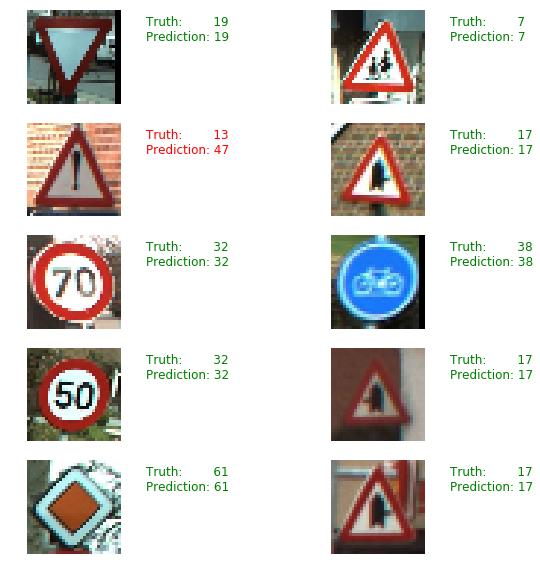

In [26]:
# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(sample_images[i])

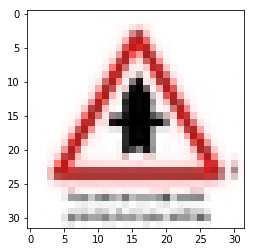

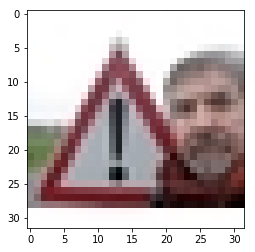

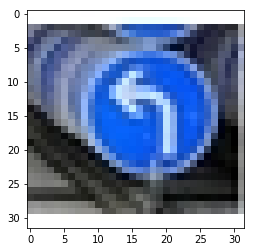

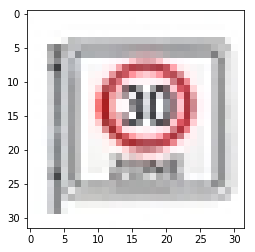

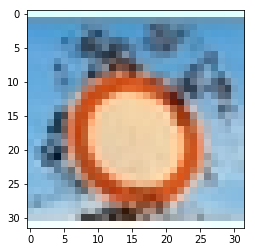

In [27]:
### Load the images and plot them here.### Load 
### Feel free to use as many code cells as needed.
import os
from PIL import Image
images = []

# Read all image into the folder
for filename in os.listdir("final_image"):
    img = Image.open(os.path.join("final_image", filename))
    img = img.resize((32, 32))
    plt.imshow(img)
    plt.show()
    img = np.array(img) / 255
    images.append(img)

In [29]:
sample_indexes = random.sample(range(len(images)), 5)
sample_images = [images[i] for i in sample_indexes]
sample_labels = [id_to_name[i] for i in sample_indexes]

# Run the "predicted_labels" op.
predictedd = session.run([predicted_labels], 
                        feed_dict={images_ph: images})[0]
print(sample_labels)
print(predictedd)

['Speed limit (20km/h)', 'Speed limit (50km/h)', 'Speed limit (30km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)']
[17 22 38 22 61]


In [390]:
session.close()

In [427]:
import pickle
file = open('data.pkl', 'wb')

# Pickle dictionary using protocol 0.
pickle.dump(image, file)
file.close()

In [49]:
import pickle

a = r"C:\Users\sm50014\Desktop\traffic\Training"
with open('train.p', 'wb') as handle:
    pickle.dump(a, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('train.p', 'rb') as handle:
    b = pickle.load(handle)

print(a == b)

True
